In [1]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

# MNIST

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
class_names = ["0", "1", "2","3", "4", "5", "6", "7", "8", "9"]

# Предобработка данных

In [4]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [5]:
y_train.shape, y_test.shape

((60000,), (10000,))

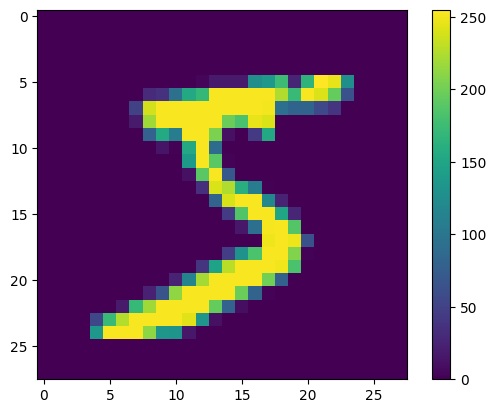

In [6]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Нормализация данных

In [7]:
x_train = x_train / 255
x_test = x_test / 255

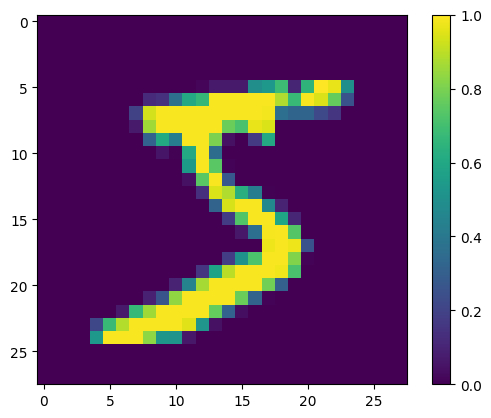

In [8]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

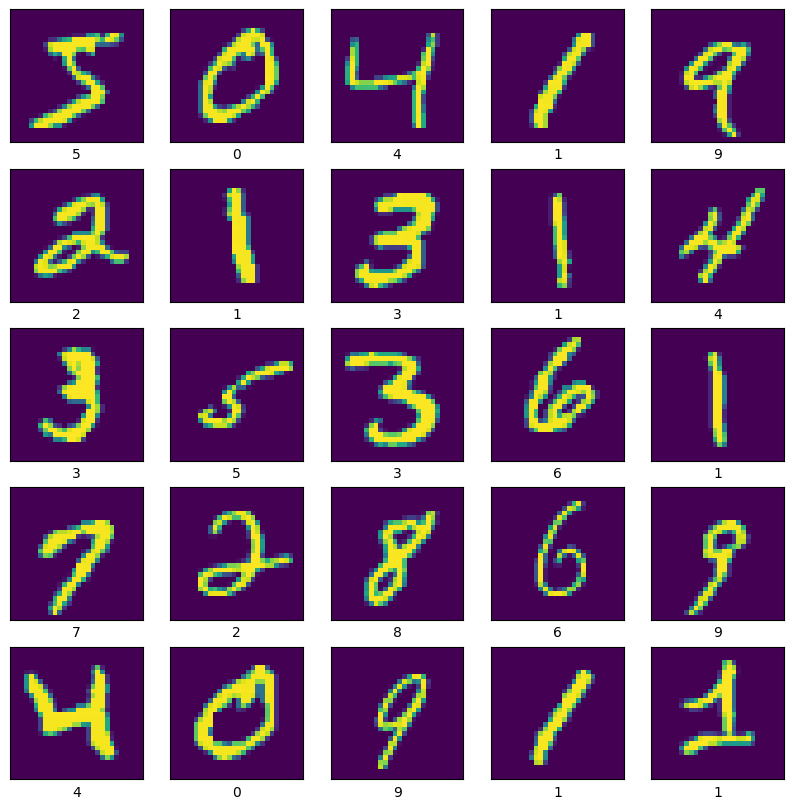

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])

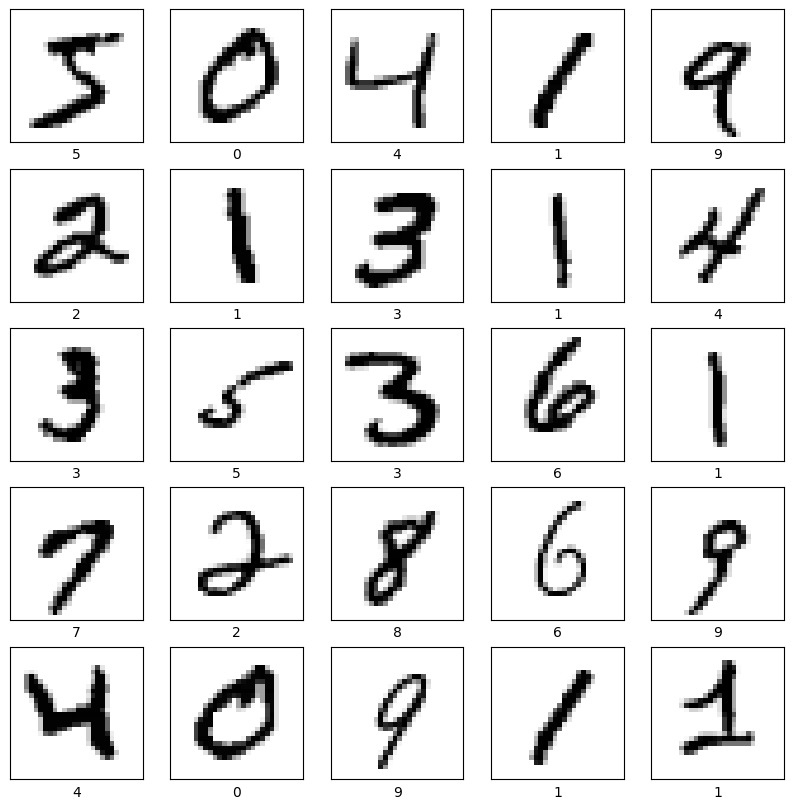

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])

### Построение модели нейронной сети 

In [11]:
model = keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(128, activation='relu'),
                         keras.layers.Dense(10, activation='softmax')])

In [12]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Тренируем модель

In [14]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6433 - accuracy: 0.8384
Epoch 2/10
1875/1875 [==============================] - 2s 980us/step - loss: 0.3371 - accuracy: 0.9060
Epoch 3/10
1875/1875 [==============================] - 2s 967us/step - loss: 0.2886 - accuracy: 0.9189
Epoch 4/10
1875/1875 [==============================] - 2s 957us/step - loss: 0.2584 - accuracy: 0.9279
Epoch 5/10
1875/1875 [==============================] - 2s 954us/step - loss: 0.2355 - accuracy: 0.9339
Epoch 6/10
1875/1875 [==============================] - 2s 966us/step - loss: 0.2170 - accuracy: 0.9397
Epoch 7/10
1875/1875 [==============================] - 2s 963us/step - loss: 0.2017 - accuracy: 0.9433
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1881 - accuracy: 0.9473
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1765 - accuracy: 0.9510
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step -

### Проверяем точность

In [15]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 930us/step - loss: 0.1620 - accuracy: 0.9532
Test accuracy: 0.9531999826431274


### Предсказываем и исследуем

In [16]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 1s 760us/step


In [17]:
predictions[0]

array([7.3173447e-05, 7.9205911e-06, 6.6287414e-04, 4.5606297e-02,
       2.4947143e-08, 9.5355660e-01, 3.9457208e-07, 5.0995437e-05,
       9.9273730e-06, 3.1815223e-05], dtype=float32)

In [18]:
np.argmax(predictions[0])

5

In [19]:
y_train[0]

5

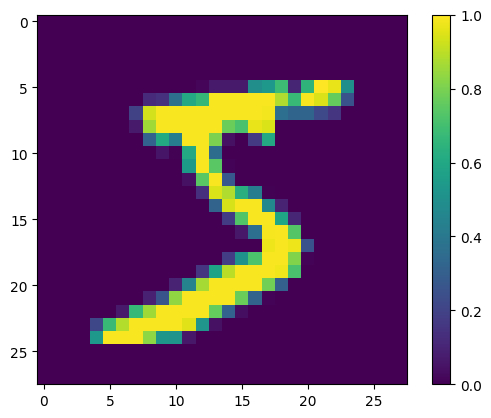

In [20]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [21]:
class_names[np.argmax(predictions[0])]

'5'

In [23]:
model.save('model12.h5')

### Задание. 

Создайте модель нейронной сети для распознавания рукописной цифр (). С помощью графического редактора создайте изображение произвольной цифры и выполните распознавание собственной рукописной цифры.